<a href="https://colab.research.google.com/github/vicotrbb/machine_learning/blob/master/projects/video_analyzer/text_quality_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text quality evaluation using text indicators

The idea here is to create a way to classify and score the quality of a input text, article, news, video speech and so on.

To achieve such goal, I think the best way will be create a dataset with loads of texts quality indicators, metadata and classifing labels, like: 'Good', 'bad', 'reasonable' etc.

This dataset will be loaded together with the evaluation tool and used to perform a simple linear regression with the input text indicators.


## Extraction of text quality indicators

Extracted from **Cornelia Kiefer** paper: **Quality Indicators for Text Data**

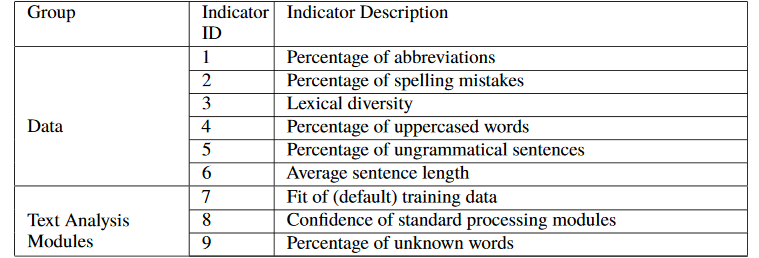

In [13]:
text = """I got a lot of questions about programming but i don't think they're the right questions to ask questions like. How many languages do i need to learn what language do i need to learn to get to company x what's the difference between a and b and which makes more money what are the exact steps i need to take. To become the. What kind of program should i write to build up my resume so why don't i like these questions because it feels like the people who are asking these questions they are learning how to program just for the sake of learning how to program. The program is just a tool. Being a programmer for me means you write code to automate things. Or to make things perform certain actions for example programming a refrigerator to turn on the light when you open the door. When you think about it. Programming is actually kind of boring. You're just giving a series of instructions to a machine over and over again until you get it right i don't want to speak for all of you. But i think it's a pay wasn't great i don't think a lot of you would spend hours and hours every night in front of the computer trying to learn how to code or to just debug your program sometimes we get caught up learning languages or doing coding challenges or fantasizing about you not working for these big tech companies that we forget why we wanted to learn programming in the first place. You wanted to program because you saw the amazing things that can be built using programming. So don't just learn how to program build something that matters build something that means something to you build something that solves a problem you're a problem solver a creator an innovator you're not a programmer programming is just a tool in your arsenal to build something amazing. You can be analytical trade of empathetic and programming allows you to express those qualities of yourself but programming in of itself is nothing special it's like a pencil it can mark stuff down if you press on the pencil hard enough. That's it but with a pencil you can write novels draw beautiful portraits build plans for a skyscraper or anything limited only by your imagination. You don't learn how to program to get into google. You learn how to program to build something meaningful something that helps real people with real problems i'm partnered of ibm today to talk about a global initiative called call for code which calls for developers to build something impactful and have a positive change across the world through their code as you know there are hundreds and hundreds of natural disasters every year like hurricanes and earthquakes floods volcanoes and wildfires those affect numerous lies and causes tremendous damage to many families around the world if you strive for real impact we desperately need you this is why 2018 call for code global challenge is a competition that ass people like you to build solutions to improve what we can do to reduce the destructive impact of his natural disasters we need all kinds of technologies."""

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stopwords_set = set(stopwords.words('english'))
stopwords_set.add('.')
stopwords_text = [word for word in text.split(' ') if word not in stopwords_set]
is_stopwords_text = [word for word in text.split(' ') if word in stopwords_set]

## Text implicit attributes


In [24]:
text_size = len(text)
text_words_number = len(text.split(' '))
text_uniques_number = len(set(stopwords_text))
text_sentences_number = len(text.split('.'))
number_stopwords = len(set(is_stopwords_text))

In [25]:
print('text size: ', text_size)
print('text number of words: ', text_words_number)
print('text number of unique words(not stopwords): ', text_uniques_number)
print('text number of stopwords: ', number_stopwords)
print('text number of sentences(splited by .): ', text_sentences_number)

text size:  3018
text number of words:  540
text number of unique words(not stopwords):  194
text number of stopwords:  66
text number of sentences(splited by .):  18


## Percentage of abbreviations

# Percentage of spelling mistakes




In [5]:
!pip install pyspellchecker

     |████████████████████████████████| 1.9MB 9.5MB/s 


In [6]:
from spellchecker import SpellChecker

In [ ]:
text = text.replace(".", "")

In [7]:
spell = SpellChecker()
spell.word_frequency.load_words(["google", r"\w+'\w+", "debug"])

misspelled = spell.unknown(stopwords_text)

In [8]:
len(misspelled)

7

In [9]:
misspelled

{"i'm", 'impactful', "that's", "they're", "what's", 'wildfires', "you're"}

## Lexical diversity

In [10]:
lexical_diversity = len(set(stopwords_text)) / len(stopwords_text) * 100
print("{:.2f}%".format(lexical_diversity))

66.55%


## Percentage of ungrammatical sentences 

## Avarange sentence length

In [11]:
text_tokens = text.split(' ')
text_words_len = 0

for t in text_tokens:
  text_words_len += len(t)

text_words_len / len(text_tokens)

4.559259259259259